In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lime import lime_tabular
import warnings
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sys import path
import os
for dirname, _, filenames in os.walk('../resources/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath('../'))

from custom import funtions

../resources/dataset_unab_ORIGINAL SIN P1.csv
../resources/dataset_unab_P1.csv


In [2]:
# Ignore warnings
warnings.filterwarnings('ignore')

In [3]:
# Read and preview data
student = pd.read_csv('../resources/dataset_unab_P1.csv')
# df = df.rename({
#     't1':'Total Nivel 1',
#     'r1':'Cantidad de Reinicios Nivel 1',
#     'p1':'Cantidad de Pruebas Nivel 1',
#     's1':'Solución Nivel 1',
#     'l1':'Largo de la Solución',
#     't2':'Tiempo Total Nivel 2',
#     'r2':'Cantidad de reinicios Nivel 2',
#     'p2':'Cantidad de Pruebas del Nivel 2',
#     's2':'Solución generada nivel 2',
#     }, axis='columns')
student.head()

,rut,t1,r1,p1,s1,l1,t2,r2,p2,s2,...,pt,game_score,score,score_a,score_p,score_d,score_s,programa,sol1,estado
0,179,26.500.862,1,1,[3 3 ] [1 1 2 2 2 ],7,167.471.077,3,10,[2 3 3 3 3 ] [1 1 1 1 2 ],...,43,1.874.461.038,8,5,3,3,2,INGENIERIA EN COMPUTACION E INFORMATICA,5.9,A
1,195,626.875.896,1,1,[3 3 3 ] [2 1 1 2 ],7,1.405.363.876,9,8,[2 3 3 3 3 3 ] [1 1 1 1 ],...,25,1.526.019.867,6,4,2,3,2,INGENIERIA CIVIL INDUSTRIAL,6.7,A
2,218,4.895.157.267,2,8,[3 3 3 0 0 3 3 ] [],7,1.148.441.373,4,36,[2 3 3 3 3 3 0 ] [1 1 1 ],...,141,2.049.771.962,7,5,2,2,3,INGENIERIA EN COMPUTACION E INFORMATICA,5.0,A
3,316,444.682.093,1,16,[3 1 3 3 3 0 3 0 0 ] [],9,507.365.574,2,14,[2 3 3 3 3 3 ] [1 1 1 1 ],...,65,1.498.582.485,7,4,3,2,3,INGENIERIA EN COMPUTACION E INFORMATICA,6.9,A
4,330,2.581.874.334,1,2,[0 3 3 3 ] [2 2 1 ],7,3.928.607.833,2,5,[2 3 3 3 3 ] [1 1 1 1 2 ],...,26,9.693.081.204,5,3,2,2,1,INGENIERIA CIVIL INDUSTRIAL,5.8,A


In [4]:
student.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 55 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rut         47 non-null     int64  
 1   t1          47 non-null     object 
 2   r1          47 non-null     int64  
 3   p1          47 non-null     int64  
 4   s1          47 non-null     object 
 5   l1          47 non-null     int64  
 6   t2          47 non-null     object 
 7   r2          47 non-null     int64  
 8   p2          47 non-null     int64  
 9   s2          47 non-null     object 
 10  l2          47 non-null     int64  
 11  t3          47 non-null     object 
 12  r3          47 non-null     int64  
 13  p3          47 non-null     int64  
 14  s3          47 non-null     object 
 15  l3          47 non-null     int64  
 16  t4          47 non-null     object 
 17  r4          47 non-null     int64  
 18  p4          47 non-null     int64  
 19  s4          47 non-null     obj

In [5]:
student.columns

Index(['rut', 't1', 'r1', 'p1', 's1', 'l1', 't2', 'r2', 'p2', 's2', 'l2', 't3',
       'r3', 'p3', 's3', 'l3', 't4', 'r4', 'p4', 's4', 'l4', 't5', 'r5', 'p5',
       's5', 'l5', 't6', 'r6', 'p6', 's6', 'l6', 'op1', 'op2', 'op3', 'op4',
       'op5', 'op6', 'sv1', 'sv2', 'sv3', 'sv4', 'sv5', 'sv6', 'lt', 'tt',
       'pt', 'game_score', 'score', 'score_a', 'score_p', 'score_d', 'score_s',
       'programa', 'sol1', 'estado'],
      dtype='object')

In [6]:
#checking if there is any column which contains null values
student.isna().sum()

rut           0
t1            0
r1            0
p1            0
s1            0
l1            0
t2            0
r2            0
p2            0
s2            0
l2            0
t3            0
r3            0
p3            0
s3            0
l3            0
t4            0
r4            0
p4            0
s4            0
l4            0
t5            0
r5            0
p5            0
s5            0
l5            0
t6            0
r6            0
p6            0
s6            0
l6            0
op1           0
op2           0
op3           0
op4           0
op5           0
op6           0
sv1           0
sv2           0
sv3           0
sv4           0
sv5           0
sv6           0
lt            0
tt            0
pt            0
game_score    0
score         0
score_a       0
score_p       0
score_d       0
score_s       0
programa      0
sol1          0
estado        0
dtype: int64

In [7]:
student.select_dtypes('object').nunique()

t1            47
s1            38
t2            47
s2            16
t3            47
s3            32
t4            47
s4            25
t5            47
s5            27
t6            47
s6            34
tt            47
game_score    47
programa       5
estado         2
dtype: int64

In [8]:
print("programa ",end=" ")
print(student['programa'].unique())
print("estado: ",end=" ")
print(student['estado'].unique())
print("game_score: ",end=" ")
print(student['game_score'].unique())
print("P1: ",end=" ")
print(student['p1'].unique())
print("score: ",end=" ")
print(student['score'].unique())

programa  ['INGENIERIA EN COMPUTACION E INFORMATICA' 'INGENIERIA CIVIL INDUSTRIAL'
 'INGENIERIA CIVIL INFORMATICA' 'BACHILLERATO EN CIENCIAS'
 'INGENIERIA INDUSTRIAL']
estado:  ['A' 'R']
game_score:  ['1.874.461.038' '1.526.019.867' '2.049.771.962' '1.498.582.485'
 '9.693.081.204' '1.684.331.613' '2.484.673.692' '1.771.366.176'
 '1.744.534.334' '2.234.538.878' '169.975.717' '1.382.697.083'
 '2.163.294.689' '1.651.923.078' '1.837.074.224' '1.573.325.139'
 '3.869.618.936' '1.216.731.512' '1.596.391.043' '2.167.759.692'
 '1.098.797.548' '1.933.030.169' '1.507.972.337' '128.064.068'
 '2.324.487.272' '1.374.539.278' '3.288.088.712' '2.618.568.187'
 '1.578.127.218' '2.052.113.795' '4.619.991.073' '1.268.842.576'
 '1.774.143.651' '1.381.356.521' '1.652.244.621' '2.016.702.781'
 '2.750.980.789' '1.636.468.565' '1.401.018.797' '2.501.291.017'
 '2.273.063.887' '157.214.572' '1.169.242.368' '2.032.284.487'
 '2.407.674.442' '164.685.076' '1.310.270.026']
P1:  [  1   8  16   2  10 130  41   7  11  

In [9]:
student['estado'].value_counts()

A    42
R     5
Name: estado, dtype: int64

Text(0.5, 1.0, 'Porcentaje de estudiantes Aprobados/Reprobados')

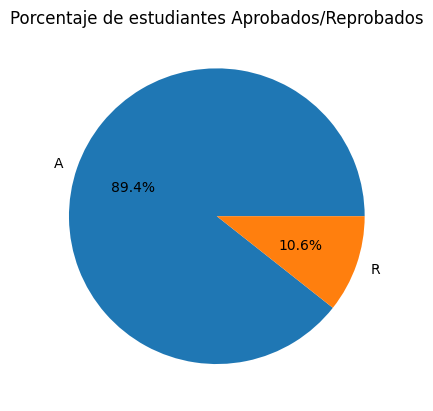

In [10]:
plt.pie(student['estado'].value_counts(),labels=['A','R'],autopct='%1.1f%%')
plt.title('Porcentaje de estudiantes Aprobados/Reprobados')

In [11]:
student['programa'].value_counts()

INGENIERIA CIVIL INDUSTRIAL                24
INGENIERIA EN COMPUTACION E INFORMATICA    14
INGENIERIA CIVIL INFORMATICA                7
BACHILLERATO EN CIENCIAS                    1
INGENIERIA INDUSTRIAL                       1
Name: programa, dtype: int64

In [12]:
#to find out the percentage of female students passed
print("Percentage of ING. CIVIL INDUSTRIAL students passed: {0:.2f}%"
    .format((student[(student['programa']=='INGENIERIA CIVIL INDUSTRIAL') & 
    (student['estado']=='A')].shape[0]/student[student['programa']=='INGENIERIA CIVIL INDUSTRIAL'].shape[0])*100))

print("Percentage of ING. EN COMPUTACION E INFORMATICA students passed: {0:.2f}%"
    .format((student[(student['programa']=='INGENIERIA EN COMPUTACION E INFORMATICA') & 
    (student['estado']=='A')].shape[0]/student[student['programa']=='INGENIERIA EN COMPUTACION E INFORMATICA'].shape[0])*100))

print("Percentage of ING. CIVIL INFORMATICA students passed: {0:.2f}%"
    .format((student[(student['programa']=='INGENIERIA CIVIL INFORMATICA') & 
    (student['estado']=='A')].shape[0]/student[student['programa']=='INGENIERIA CIVIL INFORMATICA'].shape[0])*100))

print("Percentage of BACHILLERATO EN CIENCIAS students passed: {0:.2f}%"
    .format((student[(student['programa']=='BACHILLERATO EN CIENCIAS') & 
    (student['estado']=='A')].shape[0]/student[student['programa']=='BACHILLERATO EN CIENCIAS'].shape[0])*100))

print("Percentage of INGENIERIA INDUSTRIAL students passed: {0:.2f}%"
    .format((student[(student['programa']=='INGENIERIA INDUSTRIAL') & 
    (student['estado']=='A')].shape[0]/student[student['programa']=='INGENIERIA INDUSTRIAL'].shape[0])*100))

Percentage of ING. CIVIL INDUSTRIAL students passed: 95.83%
Percentage of ING. EN COMPUTACION E INFORMATICA students passed: 85.71%
Percentage of ING. CIVIL INFORMATICA students passed: 85.71%
Percentage of BACHILLERATO EN CIENCIAS students passed: 100.00%
Percentage of INGENIERIA INDUSTRIAL students passed: 0.00%


Text(0, 0.5, 'Numero de estudiantes A/R por carrera')

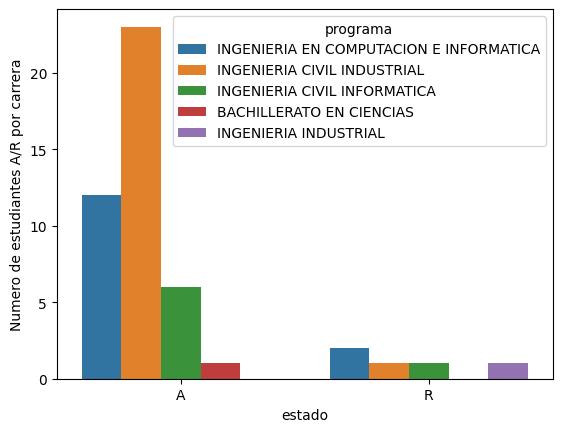

In [13]:
sns.countplot(x=student['estado'], hue=student['programa'])
plt.ylabel('Numero de estudiantes A/R por carrera')

In [14]:

student['aprobado']=student.apply(lambda x: funtions.set_int_aprobado(x['estado']),axis = 1 )

In [15]:
y = student['aprobado']
X = student[['p1',
            'score']]

In [16]:
X.head()

,p1,score
0,1,8
1,1,6
2,8,7
3,16,7
4,2,5


In [17]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: aprobado, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state= 1502)

In [19]:
model = RandomForestRegressor(random_state= 1502, n_estimators=200)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=1502)

In [20]:
explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(X_train),
                                              mode="regression",
                                              feature_names= X_train.columns,
                                              categorical_features=[0])

In [ ]:
exp = explainer.explain_instance(data_row = X_test.iloc[4],
                                 predict_fn=model.predict)
exp.show_in_notebook(show_table = True)